In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

data = pd.read_csv("news.csv")

df = data.copy()

df['News'] = df['title']+df['text']

x = df["News"]

y = df["label"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

vectorization = TfidfVectorizer()

xvtrain = vectorization.fit_transform(xtrain)

xvtest = vectorization.transform(xtest)

LR_model = LogisticRegression()

LR_model.fit(xvtrain,ytrain)

lr_y_pred = LR_model.predict(xvtest)

score = accuracy_score(ytest,lr_y_pred)

print('Accuracy of LR model is ', score)

svm_model = SVC(kernel='linear')

svm_model.fit(xvtrain,ytrain)

svm_y_pred = svm_model.predict(xvtest)

score = accuracy_score(ytest,svm_y_pred)

print('Accuracy of SVM model is ', score)

RFC_model = RandomForestClassifier(random_state=0)

RFC_model.fit(xvtrain, ytrain)

rfc_y_pred = RFC_model.predict(xvtest)

score = accuracy_score(ytest,rfc_y_pred)

print('Accuracy of RFC model is ', score)

news_headline = input("Enter News Headline - ")

data = vectorization.transform([news_headline]).toarray()

print(LR_model.predict(data))

print(svm_model.predict(data))

print(RFC_model.predict(data))

Accuracy of LR model is  0.9116161616161617
Accuracy of SVM model is  0.9349747474747475
Accuracy of RFC model is  0.8952020202020202
Enter News Headline -  Obama Lays a Wreath at Hiroshima Obama's visit comes nearly 71 years after the attack that helped bring about the end of World War II.
['FAKE']
['REAL']
['FAKE']


Accuracy of LR model is  0.6682079081632653
Accuracy of SVM model is  0.7107780612244898
Accuracy of RFC model is  0.7071109693877551


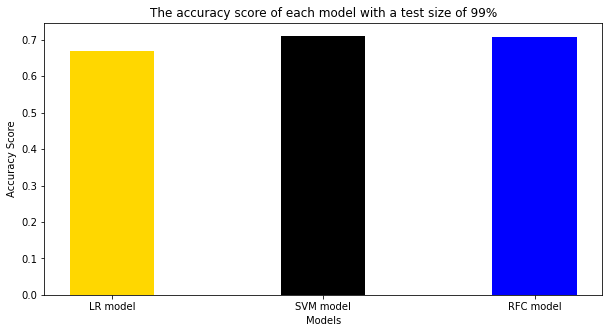

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("news.csv")

df = data.copy()

df['News'] = df['title']+df['text']

x = df["News"]

y = df["label"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.99, random_state=0)

vectorization = TfidfVectorizer()

xvtrain = vectorization.fit_transform(xtrain)

xvtest = vectorization.transform(xtest)

LR_model = LogisticRegression()

LR_model.fit(xvtrain,ytrain)

lr_y_pred = LR_model.predict(xvtest)

score1 = accuracy_score(ytest,lr_y_pred)

print('Accuracy of LR model is ', score1)

svm_model = SVC(kernel='linear')

svm_model.fit(xvtrain,ytrain)

svm_y_pred = svm_model.predict(xvtest)

score2 = accuracy_score(ytest,svm_y_pred)

print('Accuracy of SVM model is ', score2)

RFC_model = RandomForestClassifier(random_state=0)

RFC_model.fit(xvtrain, ytrain)

rfc_y_pred = RFC_model.predict(xvtest)

score3 = accuracy_score(ytest,rfc_y_pred)

colors = {'blue','gold', 'black'}
print('Accuracy of RFC model is ', score3)

data = {'LR model':score1, 'SVM model':score2, 'RFC model':score3}
models = list(data.keys())
accuracy_score = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, accuracy_score, color = colors , width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("The accuracy score of each model with a test size of 99%")
plt.show()
